In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [ ]:
df=pd.read_csv("/content/bank-full2.csv")


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

df["job"]=labelEncoder.fit_transform(df["job"])
df["marital"]=labelEncoder.fit_transform(df["marital"])
df["education"]=labelEncoder.fit_transform(df["education"])
df["housing"]=labelEncoder.fit_transform(df["housing"])
df["loan"]=labelEncoder.fit_transform(df["loan"])
df["month"]=labelEncoder.fit_transform(df["month"])
df["default"]=labelEncoder.fit_transform(df["default"])
df["y"]=labelEncoder.fit_transform(df["y"])
df["contact"]=labelEncoder.fit_transform(df["contact"])
df["poutcome"]=labelEncoder.fit_transform(df["poutcome"])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


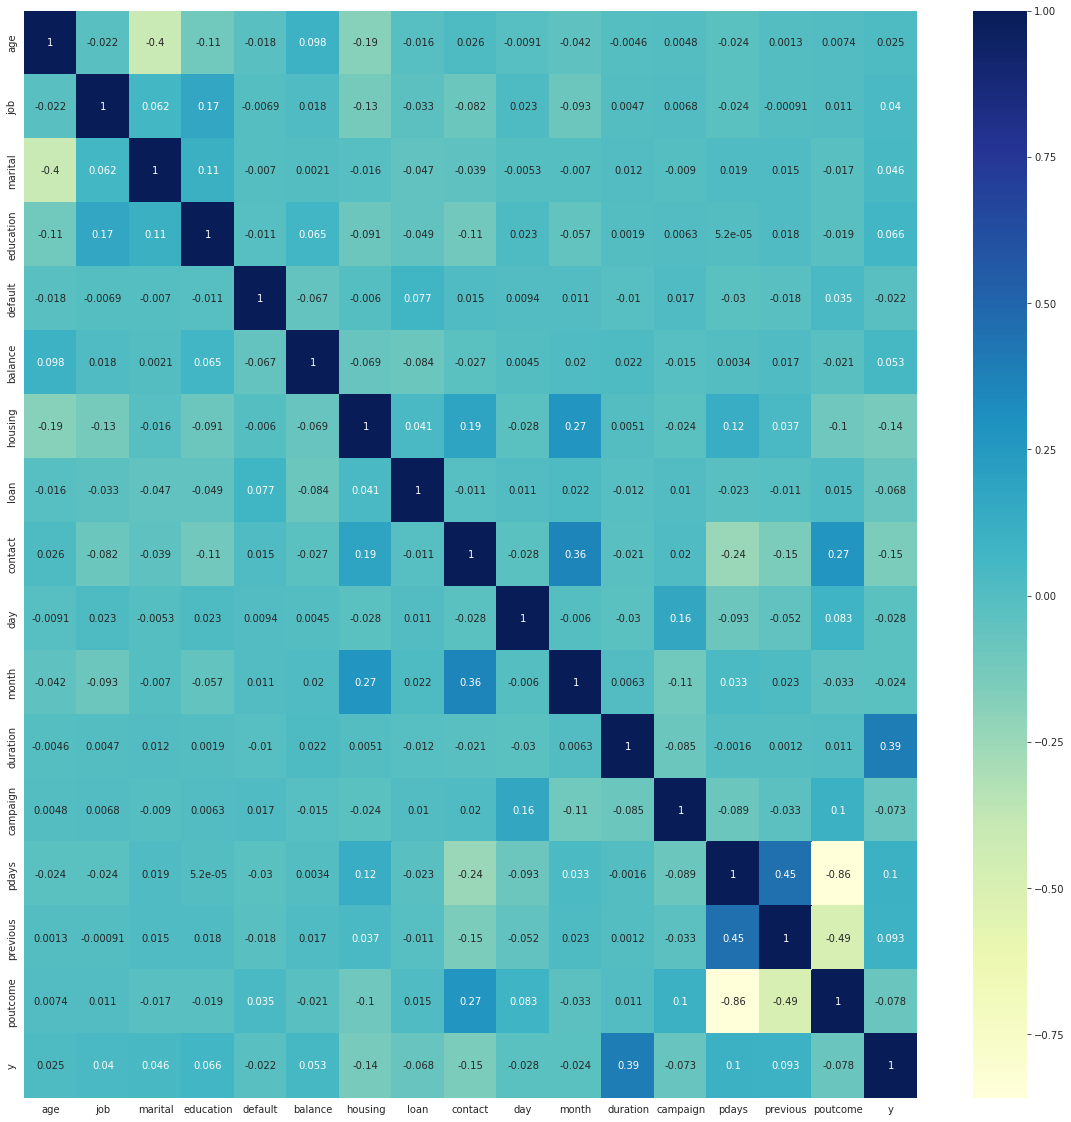

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
fig = plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()
df.head()


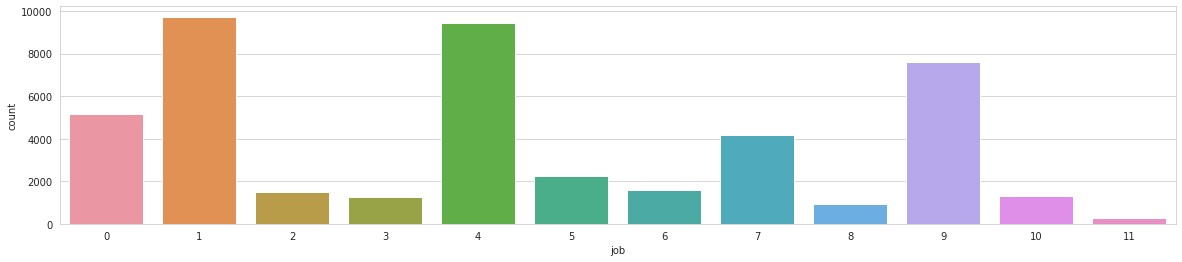

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='job',data=df)

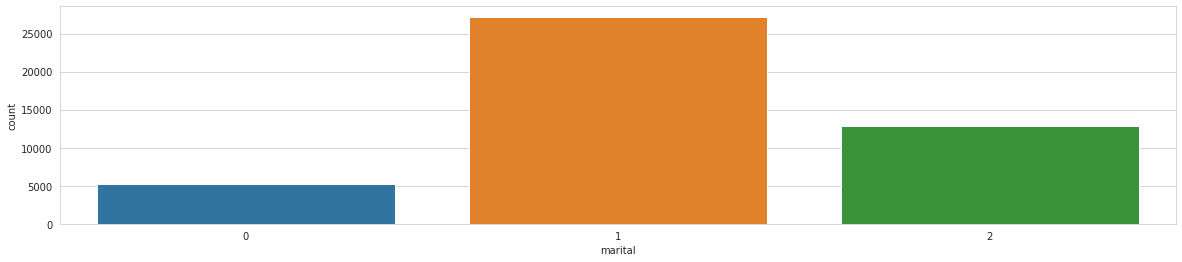

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='marital',data=df)

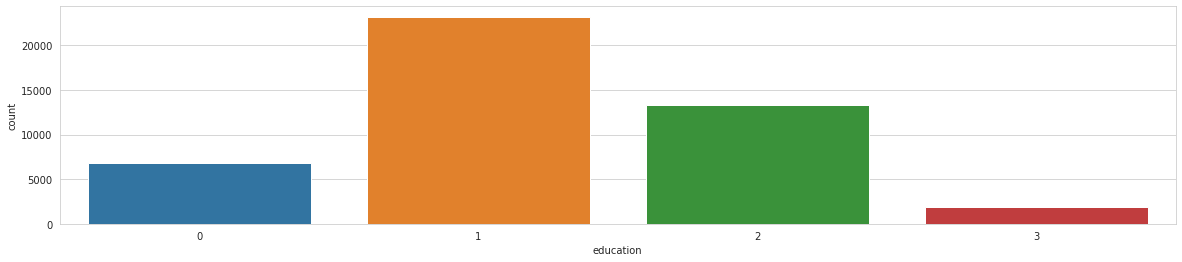

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='education',data=df)

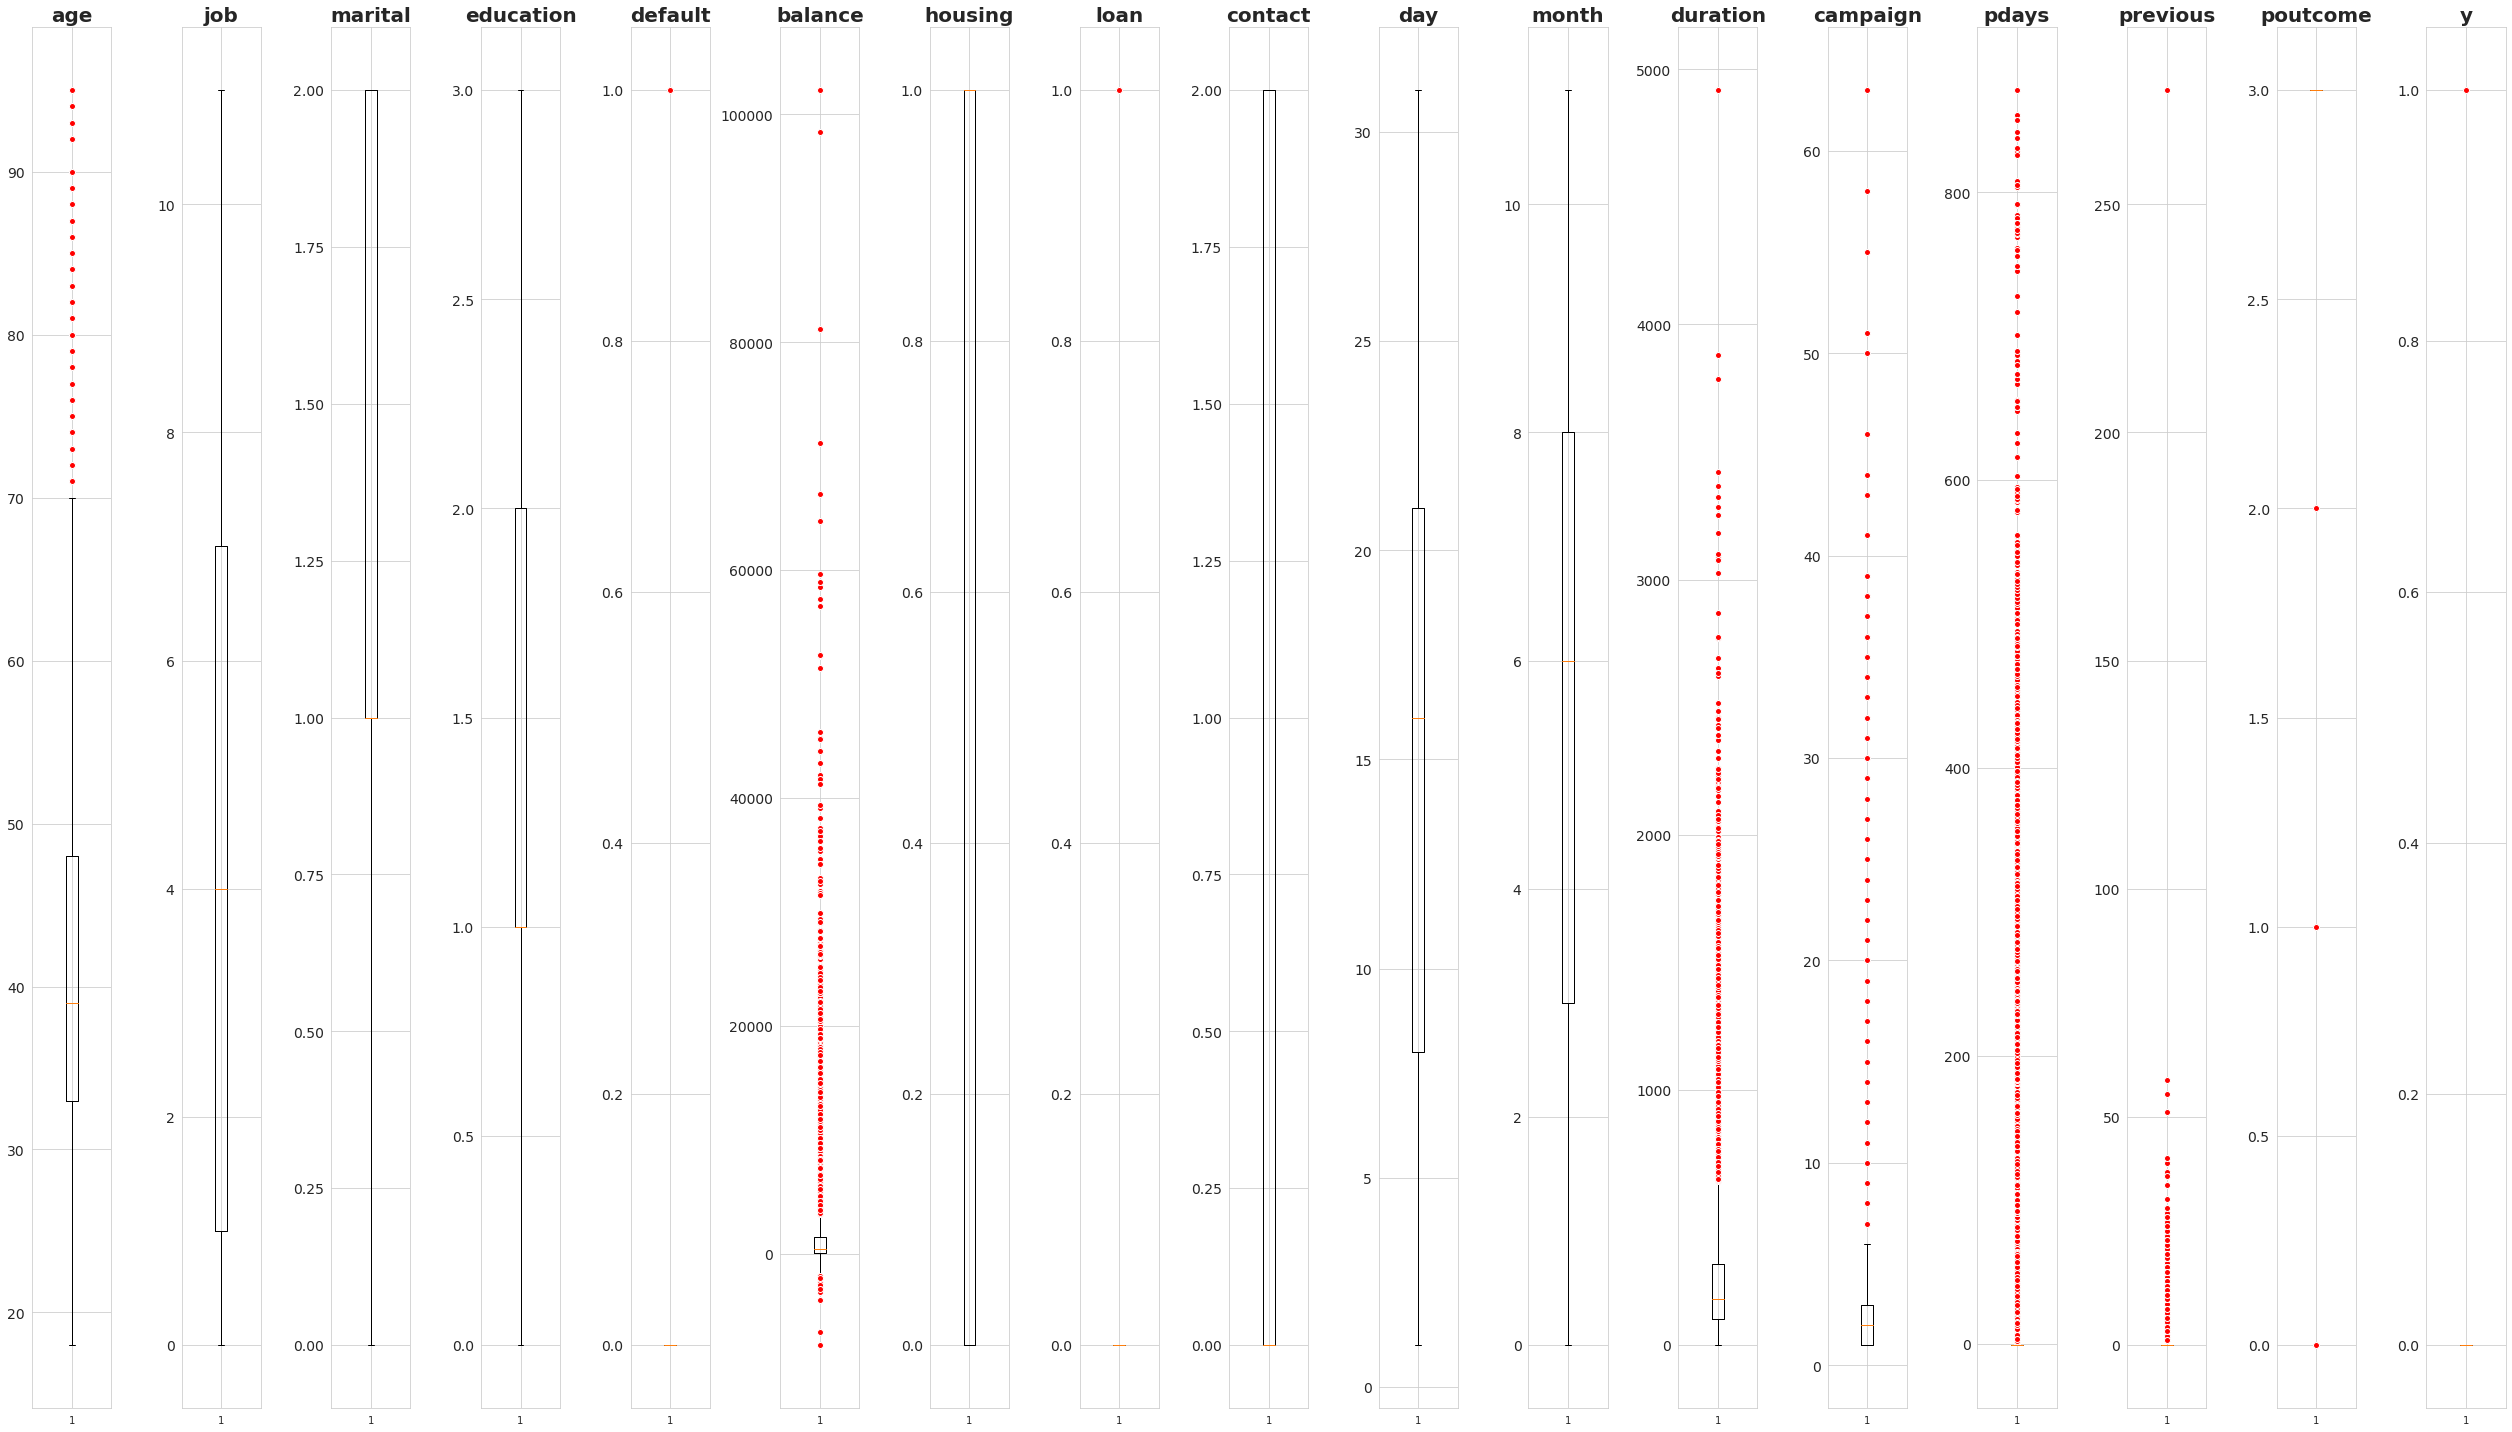

In [ ]:

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(35,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

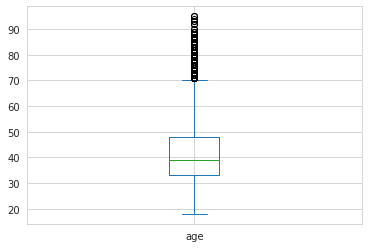

<Figure size 720x720 with 0 Axes>

In [ ]:
df['age'].plot(kind='box')
fig = plt.figure(figsize=(10,10))

In [ ]:
X = df.drop(['y'], axis=1)
y = df['y']

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: y, Length: 9043, dtype: int64

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[7661,  319],
       [ 794,  269]])

In [ ]:
ac

0.8769213756496738

In [ ]:
 from sklearn.metrics import precision_recall_fscore_support
 precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.6817870317849197, 0.6065412237083773, 0.6290708934136036, None)

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.8769213756496738, 0.8769213756496738, 0.8769213756496738, None)

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8533574215793146, 0.8769213756496738, 0.8609948362743851, None)

In [ ]:
error_rate = 1-ac
error_rate

0.12307862435032624

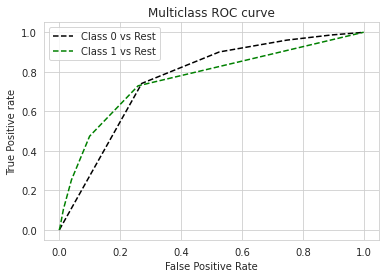

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1175494857901139
Mean Squared Error: 0.1175494857901139
Root Mean Squared Error: 0.34285490486518333


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[7980,    0],
       [1063,    0]])

In [ ]:
ac

0.8824505142098861

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
Precision

array([0.88245051,        nan])

In [ ]:
Recall

array([1., 0.])

In [ ]:
Fscore

array([0.93755507,        nan])

In [ ]:
specificity

array([0., 1.])

In [ ]:
FPR

array([1., 0.])

In [ ]:
error_rate = 1-ac
error_rate

0.11754948579011393

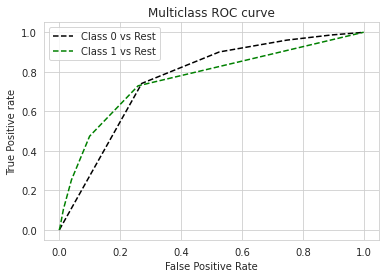

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.8412031405507022

In [ ]:
cm

array([[7128,  852],
       [ 584,  479]])

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.92427386, 0.35987979])

In [ ]:
Recall

array([0.89323308, 0.45061148])

In [ ]:
Fscore

array([0.9084884 , 0.40016708])

In [ ]:
specificity

array([0.45061148, 0.89323308])

In [ ]:
FPR

array([0.54938852, 0.10676692])

In [ ]:
error_rate = 1-ac
error_rate

0.15879685944929778

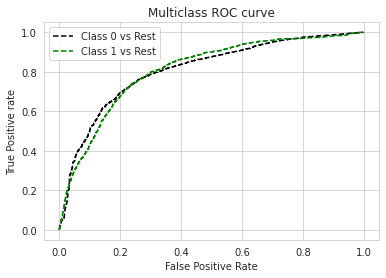

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Logistic Regression

In [ ]:
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7789,  163],
       [ 685,  406]])

In [ ]:
ac

0.9062258100187991

In [ ]:
error_rate = 1-ac
error_rate

0.0937741899812009

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.9191645 , 0.71353251])

In [ ]:
Recall

array([0.97950201, 0.37213566])

In [ ]:
Fscore

array([0.94837453, 0.48915663])

In [ ]:
specificity

array([0.37213566, 0.97950201])

In [ ]:
FPR

array([0.62786434, 0.02049799])

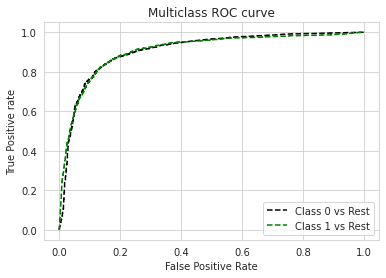

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = logisticRegr.predict(X_test)
pred_prob = logisticRegr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Decision tree using gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5)
clf_gini.fit(X_train, y_train)
y_pred= clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[9994,    0],
       [   0, 1309]])

In [ ]:
ac

1.0

In [ ]:
error_rate=1-ac

In [ ]:
error_rate

0.0

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
error_rate=1-ac

In [ ]:
Precision

array([1., 1.])

In [ ]:
Recall

array([1., 1.])

In [ ]:
specificity

array([1., 1.])

In [ ]:
Fscore

array([1., 1.])

In [ ]:
FPR

array([0., 0.])

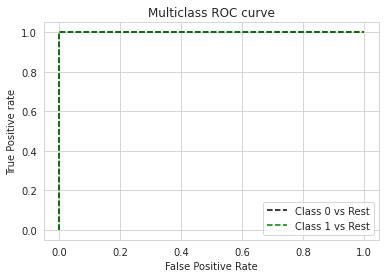

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

SVM

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[9994,    0],
       [   3, 1306]])

In [ ]:
ac

0.9997345837388304

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.99969991, 1.        ])

In [ ]:
Recall

array([1.        , 0.99770817])

In [ ]:
FPR

array([0.00229183, 0.        ])

In [ ]:
specificity

array([0.99770817, 1.        ])

In [ ]:
Fscore

array([0.99984993, 0.99885277])

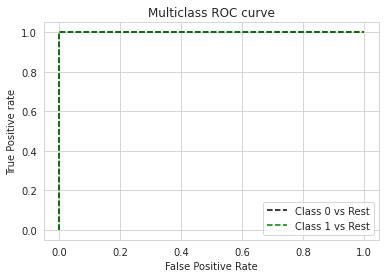

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Bernoulli Naive Bayes

In [ ]:
import numpy as np
rng = np.random.RandomState(1)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[9994,    0],
       [   0, 1309]])

In [ ]:
ac

1.0

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([1., 1.])

In [ ]:
Recall

array([1., 1.])

In [ ]:
FPR

array([0., 0.])

In [ ]:
specificity

array([1., 1.])

In [ ]:
Fscore

array([1., 1.])

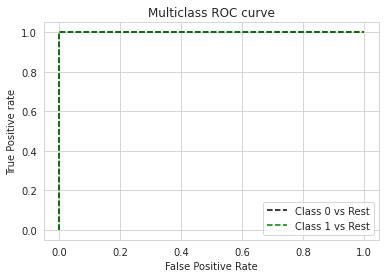

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);